### Visualize fmri data time series and stimuli pairs from dataloader

In [ ]:
from dotenv import load_dotenv
load_dotenv()
import numpy as np
import os
import sys
sys.path.append(os.getenv('PYTHONPATH')) 
import nibabel as nib
from datasets.HumanConnectomeProject import HCP_rest
import matplotlib.pyplot as plt
import seaborn as sns
from datasets.transforms import NormalizeTimeSeries, SelectGlasserROIs

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [ ]:
project_root = os.path.join(os.getenv("PROJECT_ROOT"))
dataset_root = os.path.join(os.getenv("DATASETS_ROOT"))

### Load Human Connectome Project (HCP) data

In [ ]:
hcp_fmri_root = os.path.join(dataset_root,"hcp_dataset","pre-process","hp2000_clean")
tsfm = [NormalizeTimeSeries(),
        SelectGlasserROIs(project_root, roi_selection=['V1'], average=True)]
hcp_rest_dataset_train = HCP_rest(hcp_fmri_root, project_root, phase='train', transforms=tsfm)
hcp_rest_dataset_test = HCP_rest(hcp_fmri_root, project_root, phase='test', transforms=tsfm)


In [8]:
print(len(hcp_rest_dataset_train))
print(len(hcp_rest_dataset_test))

3137
1096


In [5]:
sample = hcp_rest_dataset_train[0]
print(sample['fmri'].shape)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(1200,)


(1200,)


Text(0, 0.5, 'BOLD Signal (AU)')

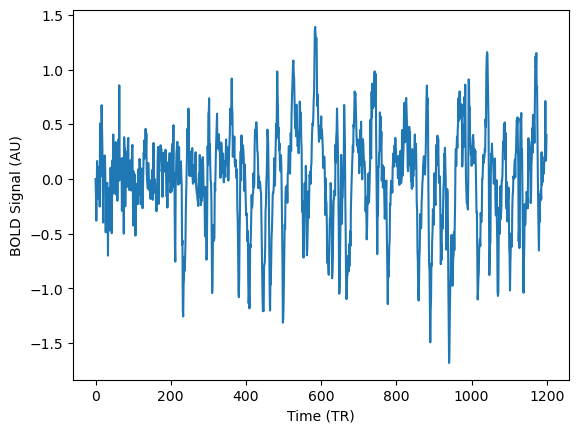

In [6]:
data = sample['fmri']
print(data.shape)
sns.lineplot(data)
plt.xlabel("Time (TR)")
plt.ylabel("BOLD Signal (AU)")

In [ ]:
vertex = 10000 #choose an arbitrary vertex
data = sample['fmri'][:,vertex]
print(data.shape)
sns.lineplot(data)
plt.xlabel("Time (TR)")
plt.ylabel("BOLD Signal (AU)")